In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('/content/Premier league data limpia este 3.csv', sep=';' , decimal=',')
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/Premier league data limpia este 3.csv'

In [5]:
data.isnull().values.any()

NameError: name 'data' is not defined

In [ ]:
df = data[["Year", "Club Name", "Player Value"]].groupby(["Year", "Club Name"],as_index=False).sum()
df["Club Name"].unique()

array(['Arsenal FC', 'Chelsea FC', 'Crystal Palace', 'Everton FC',
       'Leicester City', 'Liverpool FC', 'Manchester City',
       'Manchester United', 'Southampton FC', 'Tottenham Hotspur',
       'West Ham United'], dtype=object)

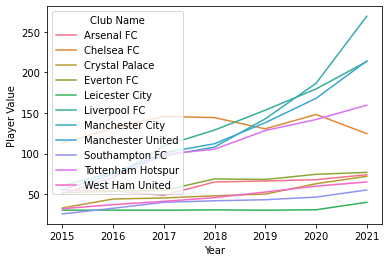

In [ ]:
import seaborn as sns
sns.lineplot(data=df, x="Year", y="Player Value",  hue="Club Name")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Club Name          2729 non-null   object 
 1   Player Name        2729 non-null   object 
 2   age                2729 non-null   int64  
 3   Player Value       2729 non-null   float64
 4   Transfer Movement  2729 non-null   object 
 5   Year               2729 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 128.0+ KB


In [ ]:
data.describe()

,age,Player Value,Year
count,2729.000000,2729.000000,2729.000000
mean,24.434958,2.372956,2017.799194
std,4.269886,3.023692,2.018241
min,16.000000,0.001070,2015.000000
25%,21.000000,0.675800,2016.000000
50%,23.000000,1.430670,2018.000000
75%,27.000000,2.889370,2020.000000
max,44.000000,59.466360,2021.000000


In [ ]:
posiciones = pd.read_csv('/content/Posiciones cuadros - Hoja 1-5.csv')
posiciones

,Club Name,2015,2016,2017,2018,2019,2020,2021
0,Arsenal FC,3,2,5,6,5,8,8
1,Chelsea FC,1,10,1,5,3,4,4
2,Crystal Palace,10,15,14,11,12,14,14
3,Everton FC,11,11,7,8,8,12,10
4,Leicester City,14,1,12,9,9,5,5
5,Liverpool FC,6,8,4,4,2,1,3
6,Manchester City,2,4,3,1,1,2,1
7,Manchester United,4,5,6,2,6,3,2
8,Southampton FC,7,6,8,17,16,11,15
9,Tottenham Hotspur,5,3,2,3,4,6,7


In [ ]:
posiciones.describe() 

,2015,2016,2017,2018,2019,2020,2021
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6.818182,6.545455,6.636364,7.181818,6.909091,7.454545,6.818182
std,4.354726,4.227615,4.249064,4.976308,4.592484,5.106146,4.622081
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,10.500000,9.000000,9.500000,10.000000,9.500000,11.500000,9.000000
max,14.000000,15.000000,14.000000,17.000000,16.000000,16.000000,15.000000


In [ ]:
df_pos = pd.melt(posiciones, id_vars = ["Club Name"], var_name = "Year")
df_pos


,Club Name,Year,value
0,Arsenal FC,2015,3
1,Chelsea FC,2015,1
2,Crystal Palace,2015,10
3,Everton FC,2015,11
4,Leicester City,2015,14
...,...,...,...
72,Manchester City,2021,1
73,Manchester United,2021,2
74,Southampton FC,2021,15
75,Tottenham Hotspur,2021,7


In [ ]:
df_pos.loc[df_pos["Club Name"] == "Arsenal FC",:] #Confirmamos que funciona

,Club Name,Year,value
0,Arsenal FC,2015,3
11,Arsenal FC,2016,2
22,Arsenal FC,2017,5
33,Arsenal FC,2018,6
44,Arsenal FC,2019,5
55,Arsenal FC,2020,8
66,Arsenal FC,2021,8


In [ ]:

df_pos.loc[df_pos["Club Name"] == "Manchester City",:]

,Club Name,Year,value
6,Manchester City,2015,2
17,Manchester City,2016,4
28,Manchester City,2017,3
39,Manchester City,2018,1
50,Manchester City,2019,1
61,Manchester City,2020,2
72,Manchester City,2021,1


In [ ]:

df_pos.loc[df_pos["Club Name"] == "Chelsea FC",:]

,Club Name,Year,value
1,Chelsea FC,2015,1
12,Chelsea FC,2016,10
23,Chelsea FC,2017,1
34,Chelsea FC,2018,5
45,Chelsea FC,2019,3
56,Chelsea FC,2020,4
67,Chelsea FC,2021,4


In [ ]:

df_pos.loc[df_pos["Club Name"] == "Manchester United",:]

,Club Name,Year,value
7,Manchester United,2015,4
18,Manchester United,2016,5
29,Manchester United,2017,6
40,Manchester United,2018,2
51,Manchester United,2019,6
62,Manchester United,2020,3
73,Manchester United,2021,2


In [ ]:
#Vemos que "Year" esta como object . Para poder utilizar la funcion de merge necesitamos que Year en df_pos sea un int64
df_pos['Year'] = df_pos['Year'].astype(int)
df_pos.dtypes

Club Name    object
Year          int64
value         int64
dtype: object

In [ ]:
df_all=data.merge(df_pos,left_on=["Club Name","Year"], right_on=["Club Name","Year"] ) #Generamos el dataset final a utilizar


In [ ]:
data["Club Name"].unique()
print(data["Club Name"].unique())
print(df_pos["Club Name"].unique())

['Arsenal FC' 'Chelsea FC' 'Crystal Palace' 'Everton FC' 'Leicester City'
 'Liverpool FC' 'Manchester City' 'Manchester United' 'Southampton FC'
 'Tottenham Hotspur' 'West Ham United']
['Arsenal FC' 'Chelsea FC' 'Crystal Palace' 'Everton FC' 'Leicester City'
 'Liverpool FC' 'Manchester City' 'Manchester United' 'Southampton FC'
 'Tottenham Hotspur' 'West Ham United']


In [ ]:
df_all.columns #Confirmamos que no quedaron columnas repetidas

Index(['Club Name', 'Player Name', 'age', 'Player Value', 'Transfer Movement',
       'Year', 'value'],
      dtype='object')

In [ ]:
from traitlets.traitlets import ClassBasedTraitType
df_all.rename(columns = {'value':'Position'}, inplace = True) #Renombramos la columna "value" como "Position"
df_all['Club Name']

0            Arsenal FC
1            Arsenal FC
2            Arsenal FC
3            Arsenal FC
4            Arsenal FC
             ...       
2724    West Ham United
2725    West Ham United
2726    West Ham United
2727    West Ham United
2728    West Ham United
Name: Club Name, Length: 2729, dtype: object

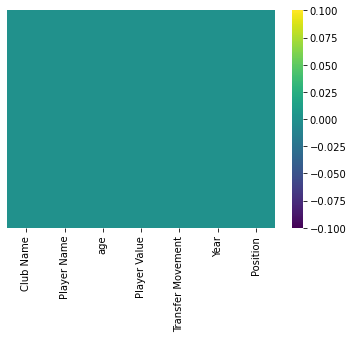

In [ ]:

sns.heatmap(df_all.isnull(),yticklabels=False,cbar=True,cmap='viridis') #Vemos que no hay missing values, es decir, el dataset está completo

In [ ]:
# df_all lista para analizar
# Necesitamos analizar por valor de club a cada año con relación a la posición de la temporada

In [ ]:
#Generamos un df con los clubes, el valor total de inversión ese año y la posición
df1 = df_all[["Year", "Club Name", "Player Value", "Position"]].groupby(["Year", "Club Name","Position"],as_index=False).sum()
df1 



,Year,Club Name,Position,Player Value
0,2015,Arsenal FC,3,55.11616
1,2015,Chelsea FC,1,112.93804
2,2015,Crystal Palace,10,32.95080
3,2015,Everton FC,11,51.63851
4,2015,Leicester City,14,30.18656
...,...,...,...,...
72,2021,Manchester City,1,269.31152
73,2021,Manchester United,2,214.15740
74,2021,Southampton FC,15,55.08324
75,2021,Tottenham Hotspur,7,159.67087


In [ ]:
df2 = df_all
df2 = df.groupby(["Year","Club Name","Player Value",], as_index= False)[['Club Name', 'Player Value']].sum()
df2


,Year,Club Name,Player Value
0,2015,Arsenal FC,55.11616
1,2015,Chelsea FC,112.93804
2,2015,Crystal Palace,32.95080
3,2015,Everton FC,51.63851
4,2015,Leicester City,30.18656
...,...,...,...
72,2021,Manchester City,269.31152
73,2021,Manchester United,214.15740
74,2021,Southampton FC,55.08324
75,2021,Tottenham Hotspur,159.67087


In [ ]:
df_all_final=df1.merge(df2,left_on=["Club Name", "Year"], right_on=["Club Name", "Year"] ) #Generamos el dataset final a utilizar

df_all_final  #eliminar player value_y

,Year,Club Name,Position,Player Value_x,Player Value_y
0,2015,Arsenal FC,3,55.11616,55.11616
1,2015,Chelsea FC,1,112.93804,112.93804
2,2015,Crystal Palace,10,32.95080,32.95080
3,2015,Everton FC,11,51.63851,51.63851
4,2015,Leicester City,14,30.18656,30.18656
...,...,...,...,...,...
72,2021,Manchester City,1,269.31152,269.31152
73,2021,Manchester United,2,214.15740,214.15740
74,2021,Southampton FC,15,55.08324,55.08324
75,2021,Tottenham Hotspur,7,159.67087,159.67087


In [ ]:
df_all_final1 = df_all_final.drop(['Player Value_y'], axis = 1)
df_all_final1

,Year,Club Name,Position,Player Value_x
0,2015,Arsenal FC,3,55.11616
1,2015,Chelsea FC,1,112.93804
2,2015,Crystal Palace,10,32.95080
3,2015,Everton FC,11,51.63851
4,2015,Leicester City,14,30.18656
...,...,...,...,...
72,2021,Manchester City,1,269.31152
73,2021,Manchester United,2,214.15740
74,2021,Southampton FC,15,55.08324
75,2021,Tottenham Hotspur,7,159.67087


In [ ]:
df_all_final1.rename(columns = {'Player Value_x':'Player Value'}, inplace = True) #Renombramos la columna "Player Value_x" como "Player Value"
df_all_final1

,Year,Club Name,Position,Player Value
0,2015,Arsenal FC,3,55.11616
1,2015,Chelsea FC,1,112.93804
2,2015,Crystal Palace,10,32.95080
3,2015,Everton FC,11,51.63851
4,2015,Leicester City,14,30.18656
...,...,...,...,...
72,2021,Manchester City,1,269.31152
73,2021,Manchester United,2,214.15740
74,2021,Southampton FC,15,55.08324
75,2021,Tottenham Hotspur,7,159.67087


In [ ]:
df_all_final1

,Year,Club Name,Position,Player Value
0,2015,Arsenal FC,3,55.11616
1,2015,Chelsea FC,1,112.93804
2,2015,Crystal Palace,10,32.95080
3,2015,Everton FC,11,51.63851
4,2015,Leicester City,14,30.18656
...,...,...,...,...
72,2021,Manchester City,1,269.31152
73,2021,Manchester United,2,214.15740
74,2021,Southampton FC,15,55.08324
75,2021,Tottenham Hotspur,7,159.67087


Dataset terminado. Comenzamos el modelo de la regresión lineal


In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
Equipos = pd.get_dummies(df_all_final1['Club Name'],drop_first=False)
Equipos


,Arsenal FC,Chelsea FC,Crystal Palace,Everton FC,Leicester City,Liverpool FC,Manchester City,Manchester United,Southampton FC,Tottenham Hotspur,West Ham United
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
72,0,0,0,0,0,0,1,0,0,0,0
73,0,0,0,0,0,0,0,1,0,0,0
74,0,0,0,0,0,0,0,0,1,0,0
75,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_all_final1 = pd.concat([df_all_final1, Equipos], axis=1)

In [ ]:
df_all_final1 = df_all_final1.drop(['Club Name'], axis = 1)
df_all_final1

,Year,Position,Player Value,Arsenal FC,Chelsea FC,Crystal Palace,Everton FC,Leicester City,Liverpool FC,Manchester City,Manchester United,Southampton FC,Tottenham Hotspur,West Ham United
0,2015,3,55.11616,1,0,0,0,0,0,0,0,0,0,0
1,2015,1,112.93804,0,1,0,0,0,0,0,0,0,0,0
2,2015,10,32.95080,0,0,1,0,0,0,0,0,0,0,0
3,2015,11,51.63851,0,0,0,1,0,0,0,0,0,0,0
4,2015,14,30.18656,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2021,1,269.31152,0,0,0,0,0,0,1,0,0,0,0
73,2021,2,214.15740,0,0,0,0,0,0,0,1,0,0,0
74,2021,15,55.08324,0,0,0,0,0,0,0,0,1,0,0
75,2021,7,159.67087,0,0,0,0,0,0,0,0,0,1,0


Definimos X e Y para nuestro modelo


In [ ]:
x = df_all_final1.drop(["Position"], axis=1).values
y = df_all_final1["Position"].values

In [ ]:
print(x) #Confirmamos que quedó bien ejecutado

[[2.0150000e+03 5.5116160e+01 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0150000e+03 1.1293804e+02 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0150000e+03 3.2950800e+01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [2.0210000e+03 5.5083240e+01 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0210000e+03 1.5967087e+02 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [2.0210000e+03 6.4963250e+01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]


In [ ]:
print(y) #Confirmamos que quedó bien ejecutado

[ 3  1 10 11 14  6  2  4  7  5 12  2 10 15 11  1  8  4  5  6  3  7  5  1
 14  7 12  4  3  6  8  2 11  6  5 11  8  9  4  1  2 17  3 13  5  3 12  8
  9  2  1  6 16  4 10  8  4 14 12  5  1  2  3 11  6 16  8  4 14 10  5  3
  1  2 15  7  6]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Separamos nuestro dataset en dos partes, una para probar nuestro modelo y otra para testear la eficiencia de este

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
print(y_pred)

[ 7.90868475 11.82637163  8.29547417 10.74543263  3.79903852  7.11142101
 13.47023445  5.06995749  4.52812    10.08726658  4.60843842  4.1368678
  8.29489371  4.57082474 10.5111263   4.48809171]


In [ ]:
df_all_final1.head()

,Year,Position,Player Value,Arsenal FC,Chelsea FC,Crystal Palace,Everton FC,Leicester City,Liverpool FC,Manchester City,Manchester United,Southampton FC,Tottenham Hotspur,West Ham United
0,2015,3,55.11616,1,0,0,0,0,0,0,0,0,0,0
1,2015,1,112.93804,0,1,0,0,0,0,0,0,0,0,0
2,2015,10,32.95080,0,0,1,0,0,0,0,0,0,0,0
3,2015,11,51.63851,0,0,0,1,0,0,0,0,0,0,0
4,2015,14,30.18656,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
lr.predict([[2015,55.11616,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,]]) 
#Tomamos los valores de la primera fila y vemos que el modelo predice que con esa inversión quedaría cuarto

array([4.10850137])

Ahora evaluaremos el modelo


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.7370927473215099

Text(0.5, 1.0, 'Real vs Predecido')

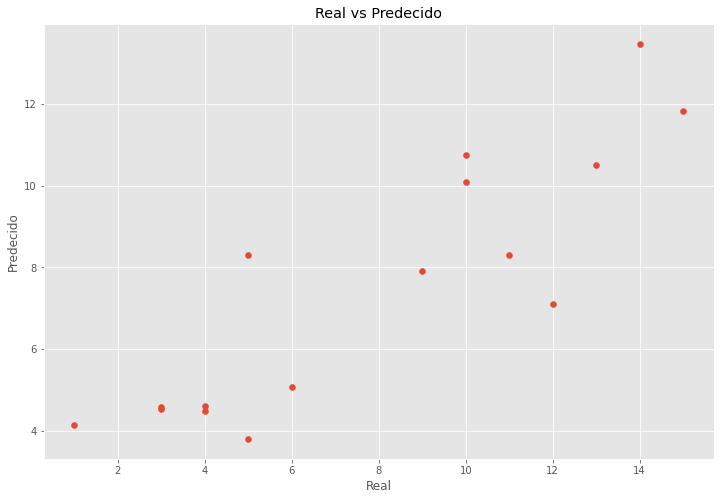

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Real")
plt.ylabel("Predecido")
plt.title("Real vs Predecido")

In [ ]:
pred_y_df = pd.DataFrame({"Valor Real":y_test, "Valor Predecido":y_pred, "Diferencia":y_test-y_pred})
pred_y_df #Generamos un DataFrame con los resultados del modelo y la diferencia con el real

,Valor Real,Valor Predecido,Diferencia
0,9,7.908685,1.091315
1,15,11.826372,3.173628
2,5,8.295474,-3.295474
3,10,10.745433,-0.745433
4,5,3.799039,1.200961
5,12,7.111421,4.888579
6,14,13.470234,0.529766
7,6,5.069957,0.930043
8,3,4.528120,-1.528120
9,10,10.087267,-0.087267


Vamos a predecir la pocicion en 2026 con la inversion incluida


In [ ]:
Arsenal = lr.predict([[2026,173.89157,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,]]) 
Arsenal

array([5.66334295])

In [ ]:
Chelsea = lr.predict([[2026,224.58838,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,]]) 
Chelsea

array([5.07539634])

In [ ]:
Crystal = lr.predict([[2026,171.98745,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,]])
Crystal

array([13.08026751])

In [ ]:
Everton = lr.predict([[2026,176.80916,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,]])
Everton

array([9.69729965])

In [ ]:
Leicester = lr.predict([[2026,139.94964,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,]])
Leicester

array([8.0834717])

In [ ]:
Liverpool = lr.predict([[2026,313.47899,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,]])
Liverpool

array([3.33901075])

In [ ]:
ManchesterC = lr.predict([[2026,369.31152000000003,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,]])
ManchesterC

array([-0.40926148])

In [ ]:
ManchesterU = lr.predict([[2026,314.1574,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,]])
ManchesterU

array([2.7106702])

In [ ]:
Southhampton = lr.predict([[2026,155.08324,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,]])
Southhampton

array([11.4364047])

In [ ]:
Tottenham = lr.predict([[2026,259.67087,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,]])
Tottenham

array([4.0832196])

In [ ]:
West = lr.predict([[2026,164.96325,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,]])
West

array([10.85723348])

In [ ]:
posiciones.mean(axis='columns')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0      5.285714
1      4.000000
2     12.857143
3      9.571429
4      7.857143
5      4.000000
6      2.000000
7      4.000000
8     11.428571
9      4.285714
10    10.714286
dtype: float64

In [ ]:
Predicts = pd.read_excel('/content/Posiciones Promedio.xlsx')
data_pred = Predicts.drop(labels=1, axis=0) # Eliminamos una columna con datos nulos
data_pred

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Equipo,Posicion Promedio 2016/2021,Posicion Predecida para 2026
2,Arsenal FC,5,6
3,Chelsea FC,4,5
4,Crystal Palace,13,13
5,Everton FC,10,10
6,Leicester City\t,7,8
7,Liverpool FC,4,3
8,Manchester City,2,1
9,Manchester United,4,2
10,Southampton FC,11,12


## **Conclusiones**

Como podemos ver al predecir la posición de los distintos clubes con una inversión de 100M a 2026 esta no es muy exacta y varía dado a que el modelo ya estima que la inversión de los clubes aumentará asi como fue aumentando en los años anteriores. Sin embargo, viendo el historial de inversores billonarios comprando clubes y reformando la estrategia de inversión de los mismos, es imposible estimar cuanto invertiran los clubes a 2026 para añadir 100M por lo que tomamos las cifras de 2021.


```

```
A su vez, existen varios factores que hacen de este mercado uno poco predecible. Uno es el factor humano, por más de que un club invierta 50 millones comprando una estrella futbolística, esta puede, pero no asegurará contribuir al éxito del equipo, mientras que tambien se podría lesionar y hacer de esa inversión algo inútil por lo que realmente hay muchos factores externos que hacen que un modelo de regresión lineal no sea el ideal si queremos proyectar, en el mundo real, para inversores reales, como reaccionarían sus inversiones frente a los resultados 
```

```
De todas formas, si tuviesemos que tomar una desición en base a las predicciones del modelo diríamos que lo ideal para el inversor sería invertir en el Manchesr United ya que es el cuadro que presenta una mayor variación pasando de un resultado promedio de 4 a salir segundo en la temporada de 2026 por lo que generaría un gran impacto en el club teniendo en cuenta que la diferencia en cuanto a ingresos que generan los clubes al salir cuartos vs salir segundos, lo cual lo clasifica a más campeonatos y así genera una mayor venta entradas e indumentaria, es muy grande.


